## Visión por Computadora 1

## Trabajo Práctico N° 3

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |
| Juan José Cardinali   | juanchijc@gmail.com       | a1809   |

### ENUNCIADO

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en *Material_TPs/TP3/images* a partir del template *Material_TPs/TP3/template*.

1. (4puntos) Obtener una detección del logo en cada imagen sin falsos positivos.

2. (4puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen *coca_multi.png* con el mismo template del ítem1.

3. (2puntos) Generalizar el algoritmo del item2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

### RESOLUCIÓN

#### LIBRERÍAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

#### DETECCIÓN DEL LOGO

In [2]:
# Definimos la lista de archivos a leer

def get_files(folderpath, extensions):
    # Filtra solo los archivos que tengan las extensiones deseadas
    files_list = []
    for file_name in os.listdir(folderpath):
        if any(file_name.endswith(ext) for ext in extensions):
            files_list.append(file_name)
    return files_list

folderpath = './Imagenes/'  # Asegúrate de que esta ruta sea correcta

# Obtener imágenes de la carpeta
imgs_to_read = get_files(folderpath, ['.png', '.jpg'])
imgs_to_read

['COCA-COLA-LOGO.jpg',
 'coca_logo_1.png',
 'coca_logo_2.png',
 'coca_multi.png',
 'coca_retro_1.png',
 'coca_retro_2.png',
 'logo_1.png']

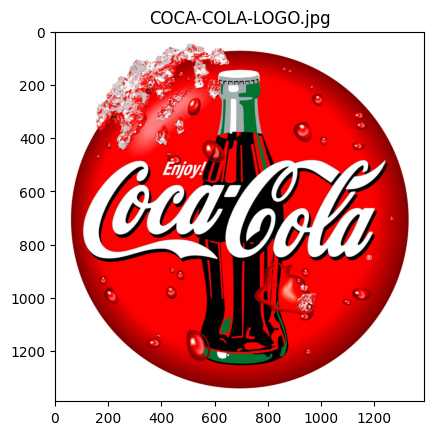

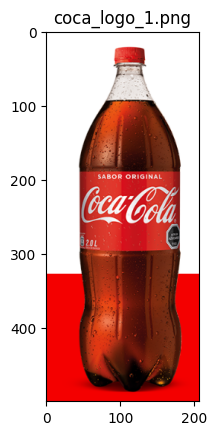

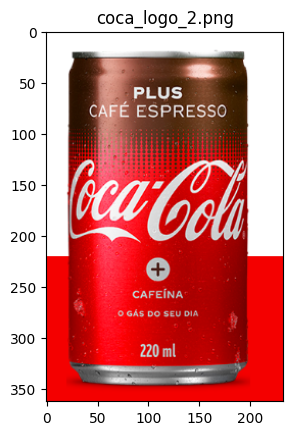

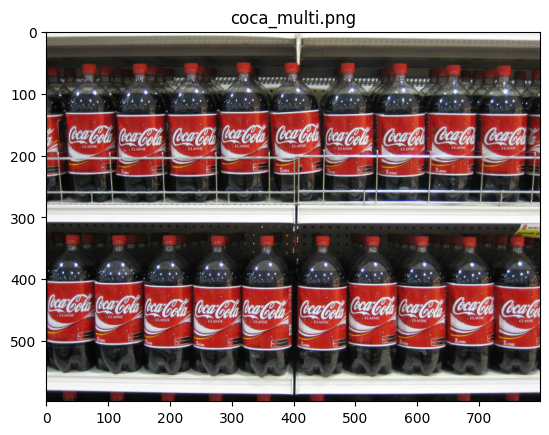

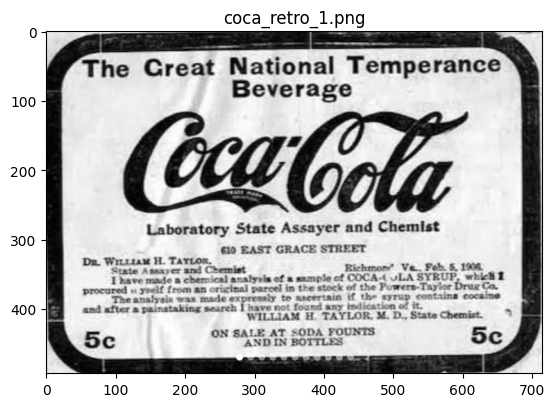

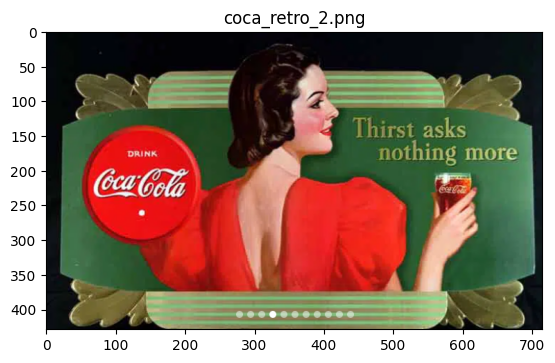

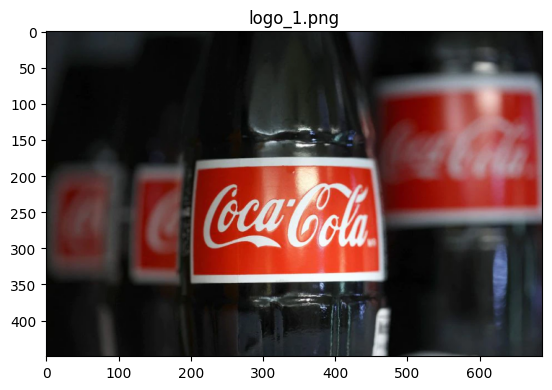

In [ ]:
# Visualizamos las imágenes

for img_name in imgs_to_read:

    img_path = folderpath + img_name
    img = cv.imread(img_path)
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    plt.figure()
    plt.imshow(imgRGB)
    plt.title(img_name)
    plt.show()

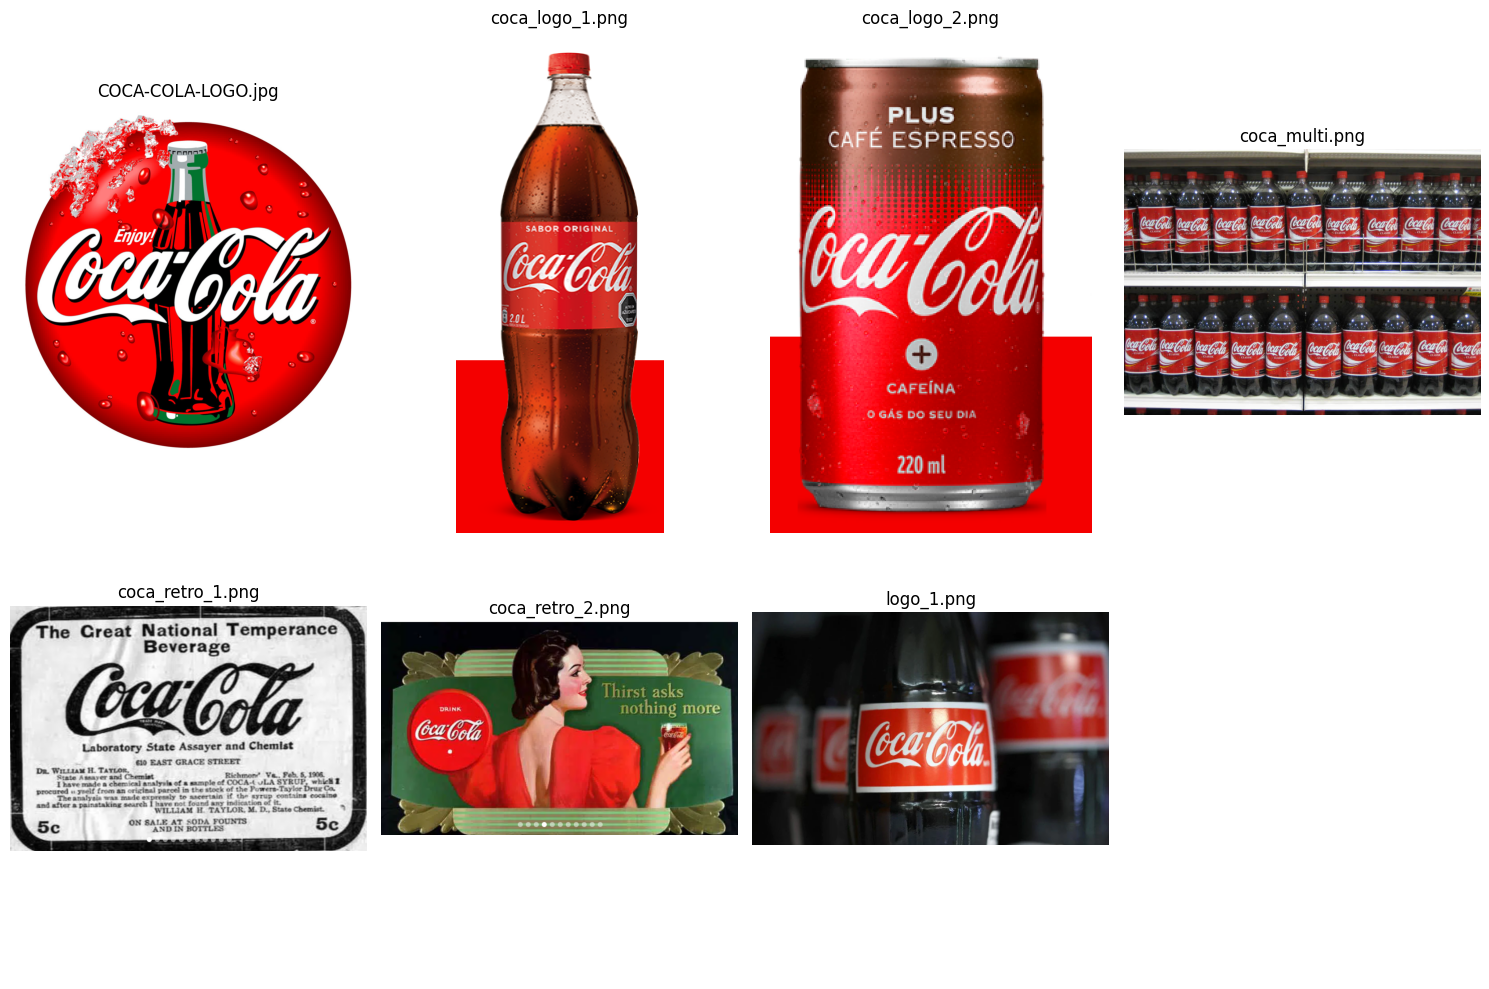

In [7]:
# Configuramos el número de filas y las columnas basadas en la cantidad de imágenes
num_imagenes = len(imgs_to_read)
num_columnas = (num_imagenes + 1) // 2  # Calcula el número de columnas, redondeando hacia arriba
num_filas = 2  # Siempre tenemos 2 filas

# Crear una figura y un conjunto de subgráficas
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 10))
axs = axs.flatten()  # Aplanar la matriz de ejes para que sea más fácil de manejar

# Visualizar cada imagen
for i, img_name in enumerate(imgs_to_read):
    img_path = folderpath + img_name
    img = cv.imread(img_path)

    if img is not None:
        imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        axs[i].imshow(imgRGB)
        axs[i].set_title(img_name)  # Establecer el título como el nombre de la imagen
        axs[i].axis('off')  # Desactivar los ejes
    else:
        print(f"No se pudo cargar la imagen: {img_path}")

# Desactivar los ejes para los subgráficos que no se utilizan
for j in range(i + 1, num_filas * num_columnas):
    axs[j].axis('off')

plt.tight_layout()  # Ajustar el espaciado entre las subgráficas
plt.show()